In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [2]:
data = pd.read_csv("loan.csv")
data.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              61 non-null     int64 
 1   gender           61 non-null     object
 2   occupation       61 non-null     object
 3   education_level  61 non-null     object
 4   marital_status   61 non-null     object
 5   income           61 non-null     int64 
 6   credit_score     61 non-null     int64 
 7   loan_status      61 non-null     object
dtypes: int64(3), object(5)
memory usage: 3.9+ KB


In [4]:
data.describe()

,age,income,credit_score
count,61.000000,61.000000,61.000000
mean,37.081967,78983.606557,709.836066
std,8.424755,33772.025802,72.674888
min,24.000000,25000.000000,560.000000
25%,30.000000,52000.000000,650.000000
50%,36.000000,78000.000000,720.000000
75%,43.000000,98000.000000,770.000000
max,55.000000,180000.000000,830.000000


In [5]:
data.isnull().sum()

age                0
gender             0
occupation         0
education_level    0
marital_status     0
income             0
credit_score       0
loan_status        0
dtype: int64

In [6]:
obj = data.select_dtypes(include=['object'])
obj

,gender,occupation,education_level,marital_status,loan_status
0,Male,Engineer,Bachelor's,Married,Approved
1,Female,Teacher,Master's,Single,Approved
2,Male,Student,High School,Single,Denied
3,Female,Manager,Bachelor's,Married,Approved
4,Male,Accountant,Bachelor's,Married,Approved
...,...,...,...,...,...
56,Male,Architect,Master's,Married,Approved
57,Female,Receptionist,High School,Single,Denied
58,Male,Banker,Bachelor's,Married,Approved
59,Female,Writer,Master's,Single,Approved


In [7]:
data['education_level'].unique()

array(["Bachelor's", "Master's", 'High School', "Associate's", 'Doctoral'],
      dtype=object)

In [8]:
data['gender'] = data['gender'].replace({'Male':0,'Female':1})
data['loan_status'] = data['loan_status'].replace({'Approved':0,'Denied':1})

C:\Users\ELCOT\AppData\Local\Temp\ipykernel_980\1329582271.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['gender'] = data['gender'].replace({'Male':0,'Female':1})
C:\Users\ELCOT\AppData\Local\Temp\ipykernel_980\1329582271.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['loan_status'] = data['loan_status'].replace({'Approved':0,'Denied':1})


In [9]:
data.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,0,Engineer,Bachelor's,Married,85000,720,0
1,45,1,Teacher,Master's,Single,62000,680,0
2,28,0,Student,High School,Single,25000,590,1
3,51,1,Manager,Bachelor's,Married,105000,780,0
4,36,0,Accountant,Bachelor's,Married,75000,710,0


In [10]:
data['marital_status'] = data['marital_status'].replace({'Single':0,'Married':1})

C:\Users\ELCOT\AppData\Local\Temp\ipykernel_980\3738543280.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['marital_status'] = data['marital_status'].replace({'Single':0,'Married':1})


In [11]:
occupation_map = {
    "Bachelor's": 0,
    "Master's": 1,
    'High School': 2,
    "Associate's": 3,
    'Doctoral': 4
}

data['education_level'] = data['education_level'].map(occupation_map)

In [12]:
data['occupation'].unique()

array(['Engineer', 'Teacher', 'Student', 'Manager', 'Accountant', 'Nurse',
       'Lawyer', 'Artist', 'IT', 'Doctor', 'Consultant', 'Analyst',
       'Salesman', 'Marketing', 'Architect', 'Designer', 'Pharmacist',
       'Researcher', 'Professor', 'Pilot', 'Receptionist', 'Banker',
       'Writer', 'Chef', 'Veterinarian', 'Sales', 'HR', 'Electrician',
       'Realtor', 'Photographer', 'Editor', 'Programmer', 'Dentist',
       'Musician', 'Psychologist', 'Server', 'Software', 'Stylist'],
      dtype=object)

In [13]:
enc = LabelEncoder()

data['occupation_le'] = enc.fit_transform(data.pop('occupation'))

In [14]:
data.head()

,age,gender,education_level,marital_status,income,credit_score,loan_status,occupation_le
0,32,0,0,1,85000,720,0,12
1,45,1,1,0,62000,680,0,35
2,28,0,2,0,25000,590,1,33
3,51,1,0,1,105000,780,0,16
4,36,0,0,1,75000,710,0,0


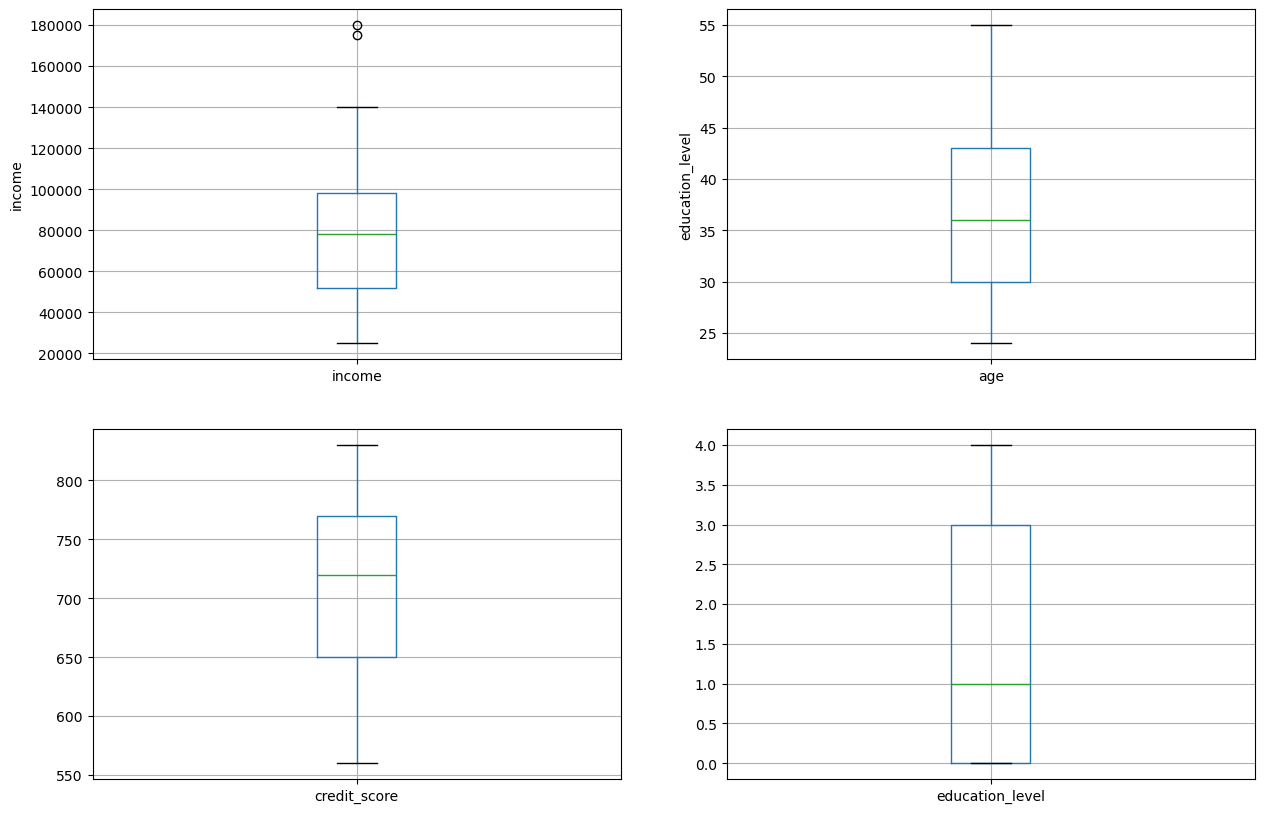

In [15]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
fig = data.boxplot('income')
fig.set_ylabel('income')

plt.subplot(2,2,2)
fig = data.boxplot('age')
fig.set_ylabel('age')

plt.subplot(2,2,3)
data.boxplot('credit_score')
fig.set_ylabel('credit_score')

plt.subplot(2,2,4)
data.boxplot('education_level')
fig.set_ylabel('education_level')
plt.show()

In [16]:
IQR = data.income.quantile(0.75) - data.income.quantile(0.25)
lower = data.income.quantile(0.25) - (IQR*1.5)
higher = data.income.quantile(0.75) + (IQR*1.5)
outliers = (data['income'] < lower) | (data['income'] > higher)
print(f'outliers:{lower},{higher}')

outliers:-17000.0,167000.0


In [17]:
out = np.where(outliers)
out

(array([ 9, 47], dtype=int64),)

In [18]:
mean_value = data.loc[~outliers, 'income'].mean()
data['income'] = np.where(outliers,mean_value,data['income'])
data.head()

,age,gender,education_level,marital_status,income,credit_score,loan_status,occupation_le
0,32,0,0,1,85000.0,720,0,12
1,45,1,1,0,62000.0,680,0,35
2,28,0,2,0,25000.0,590,1,33
3,51,1,0,1,105000.0,780,0,16
4,36,0,0,1,75000.0,710,0,0


In [19]:
X = data.drop(columns=['loan_status'])
y = data['loan_status']

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
y_train.shape,y_test.shape,X_train.shape,X_test.shape

((42,), (19,), (42, 7), (19, 7))

In [21]:
scaler = StandardScaler()
X_train_vec = scaler.fit_transform(X_train)
X_test_vec = scaler.transform(X_test)

In [22]:
model = DecisionTreeClassifier()
model.fit(X_train_vec,y_train)
y_pred = model.predict(X_test_vec)
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy:',accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8947368421052632
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.85      0.92        13
           1       0.75      1.00      0.86         6

    accuracy                           0.89        19
   macro avg       0.88      0.92      0.89        19
weighted avg       0.92      0.89      0.90        19

Confusion Matrix:
 [[11  2]
 [ 0  6]]
